#  Лабораторная работа 5

### Задание: 
Построить прогноз на 8 месяцев. 
### Вариант 4
Средняя цена номера в отеле в долларах (Average Daily Rate (in $)) Данные для Chicago Metropolitan Area . Предоставлены средние значения цены за один день. Усреднение по отелям и по дням месяца.
Данные расположены в столбце x4 файла Chicago_hotels.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#  matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("Chicago_hotels.csv", sep = ';', decimal = ',')
df.head()

,date1,date2,x1,x2,x3,x4
0,January,1994,"44,3","104,04","51,9","72,15"
1,February,1994,"54,7","102,74","60,1","73,47"
2,March,1994,"61,9","105,23",65,"74,91"
3,April,1994,"69,1","113,63","69,8","79,06"
4,May,1994,"70,8","120,77","72,4","82,07"


In [4]:
df_2 = df.drop(columns=["x1","x2","x3"])
df_2.tail()

,date1,date2,x4
115,August,2003,
116,September,2003,
117,October,2003,
118,November,2003,
119,December,2003,


In [5]:
df_2 = df_2[(df['x4'] != ' ')]
df_2.tail()

,date1,date2,x4
107,December,2002,"99,1"
108,January,2003,"92,88"
109,February,2003,"90,99"
110,March,2003,"99,62"
111,April,2003,"101,32"


In [6]:
df_2['x4'] = df_2['x4'].apply(lambda x: float(x.replace(',', '.')))
df_3 = df_2
df_2.sample(10)

,date1,date2,x4
74,March,2000,108.18
67,August,1999,112.04
6,July,1994,77.22
109,February,2003,90.99
108,January,2003,92.88
100,May,2002,114.95
88,May,2001,123.12
43,August,1997,101.38
110,March,2003,99.62
68,September,1999,115.42


Построим графики коэфицента цены.
Надо разгадать тип тренда (линейный или нет) и характер сезонности (аддитивный или мультипликативный).

На первом графике для исходного ряда видны параболический тренд и аддитивная сезонность.
На втором графике ряд логарифмов исходного ряда. На нем сезонные поправки остались аддитивными, это подтверждает гипотезу о аддитивном характере сезонности.

Text(0, 0.5, 'log10 от коэфицента цены')

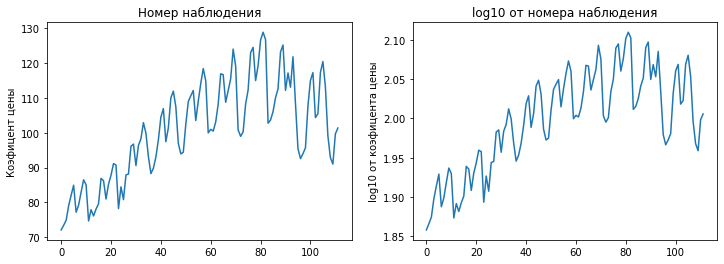

In [7]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121)
df_2['x4'].plot(ax=ax1)
ax1.set_title(u'Номер наблюдения')
ax1.set_ylabel(u'Коэфицент цены')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df_2['x4'])).plot(ax=ax2)
ax2.set_title(u'log10 от номера наблюдения')
ax2.set_ylabel(u'log10 от коэфицента цены')


Вывод: будем прогнозировать логарифм коэфицента цены с помощью модели линейной регрессии. 
$$\log y_i = \alpha + \beta \cdot x_i + c(x_i) + \varepsilon_i,$$
где $y_i$ -- коэфицент цены, $x_i$ -- порядковый номер месяца, $c(x_i)$ -- сезонная составляющая, $\varepsilon_i$ -- случайные отклонения.

Прологарифмируем временной ряд. <br> Создадим предиктор ```month_num``` -- номер наблюдения, то есть номер месяца, считая от первого наблюдения.  Тем самым мы зададим линейный тренд. 

In [8]:
df_2['month_num'] = range(1, len(df_2) + 1)
df_2['month_num2'] =df_2['month_num']*df_2['month_num']
df_2['log_y'] = np.log10(df_2['x4'])
df_2.head()

,date1,date2,x4,month_num,month_num2,log_y
0,January,1994,72.15,1,1,1.858236
1,February,1994,73.47,2,4,1.866110
2,March,1994,74.91,3,9,1.874540
3,April,1994,79.06,4,16,1.897957
4,May,1994,82.07,5,25,1.914184


In [9]:
#  Эти переменные в модели не нужны
df_2 = df_2.drop(columns=["date1", "date2", "x4"])
df_2.head()

,month_num,month_num2,log_y
0,1,1,1.858236
1,2,4,1.866110
2,3,9,1.874540
3,4,16,1.897957
4,5,25,1.914184


Создадим новые переменные - индикаторы месяцев

In [10]:
df_2["m01"] = [1,0,0,0,0,0,0,0,0,0,0,0]*9 + [1, 0, 0, 0]
df_2["m02"] = [0,1,0,0,0,0,0,0,0,0,0,0]*9 + [0, 1, 0, 0]
df_2["m03"] = [0,0,1,0,0,0,0,0,0,0,0,0]*9 + [0, 0, 1, 0]
df_2["m04"] = [0,0,0,1,0,0,0,0,0,0,0,0]*9 + [0, 0, 0, 1]
df_2["m05"] = [0,0,0,0,1,0,0,0,0,0,0,0]*9 + [0, 0, 0, 0]
df_2["m06"] = [0,0,0,0,0,1,0,0,0,0,0,0]*9 + [0, 0, 0, 0]
df_2["m07"] = [0,0,0,0,0,0,1,0,0,0,0,0]*9 + [0, 0, 0, 0]
df_2["m08"] = [0,0,0,0,0,0,0,1,0,0,0,0]*9 + [0, 0, 0, 0]
df_2["m09"] = [0,0,0,0,0,0,0,0,1,0,0,0]*9 + [0, 0, 0, 0]
df_2["m10"] = [0,0,0,0,0,0,0,0,0,1,0,0]*9 + [0, 0, 0, 0]
df_2["m11"] = [0,0,0,0,0,0,0,0,0,0,1,0]*9 + [0, 0, 0, 0]
df_2["m12"] = [0,0,0,0,0,0,0,0,0,0,0,1]*9 + [0, 0, 0, 0]

In [11]:
#  Проверка
df_2.head(14)

,month_num,month_num2,log_y,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,1,1,1.858236,1,0,0,0,0,0,0,0,0,0,0,0
1,2,4,1.866110,0,1,0,0,0,0,0,0,0,0,0,0
2,3,9,1.874540,0,0,1,0,0,0,0,0,0,0,0,0
3,4,16,1.897957,0,0,0,1,0,0,0,0,0,0,0,0
4,5,25,1.914184,0,0,0,0,1,0,0,0,0,0,0,0
5,6,36,1.929215,0,0,0,0,0,1,0,0,0,0,0,0
6,7,49,1.887730,0,0,0,0,0,0,1,0,0,0,0,0
7,8,64,1.898999,0,0,0,0,0,0,0,1,0,0,0,0
8,9,81,1.918712,0,0,0,0,0,0,0,0,1,0,0,0
9,10,100,1.936966,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
#  Создаем таблицу (столбец) откликов.
y = df_2['log_y']

In [13]:
#  Создаем матрицу предикторов.
#  Убираем из нее отклик и столбец индикаторов базового месяца
X = df_2.drop(columns=["log_y", "m03"])

In [14]:
#  Подгонка модели
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Посмотрим на коэффициенты модели

In [15]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,1.837168
1,month_num,0.004670
2,month_num2,-0.000029
3,m01,-0.018455
4,m02,-0.020001
5,m04,0.017384
6,m05,0.046596
7,m06,0.050551
8,m07,0.011778
9,m08,0.027255


Максимальная цена в июне, начало каникул.
Минимальная в декабре подготовка к рождеству или новому году.

In [16]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

К коэффициентам модели добавим проверку гипотез о равенстве этих коэффициентов нулю.

In [17]:
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,1.837168,0.000000e+00
1,month_num,0.004670,0.000000e+00
2,month_num2,-0.000029,0.000000e+00
3,m01,-0.018455,1.054044e-02
4,m02,-0.020001,5.691365e-03
5,m04,0.017384,1.580945e-02
6,m05,0.046596,4.106360e-09
7,m06,0.050551,2.945126e-10
8,m07,0.011778,1.093209e-01
9,m08,0.027255,2.977378e-04


<AxesSubplot:>

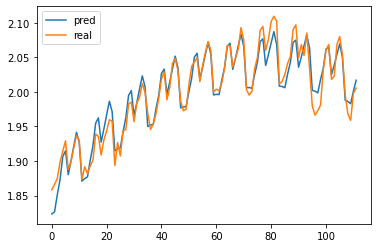

In [18]:
#  Сравним подгонку и ряд логарифмов

pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [19]:
#  Проверка
pred.head(14)

,pred,real
0,1.823355,1.858236
1,1.826393,1.866110
2,1.850920,1.874540
3,1.872773,1.897957
4,1.906397,1.914184
5,1.914705,1.929215
6,1.880229,1.887730
7,1.899944,1.898999
8,1.921116,1.918712
9,1.941656,1.936966


Только что построили подгонку (fit), используя модель для временного ряда. <br>
Переходим к прогнозированию.

In [20]:
#  Готовим матрицу значений предикторов df_3 
#  для вычисления прогнозов на 12 месяцев вперед
#  Сначала добавляем в нее время (номер месяца)
df_3 = pd.DataFrame()

df_3['month_num'] = range(113, 125)
df_3['month_num2'] =df_3['month_num']*df_3['month_num']

In [21]:
#  Проверка
df_3.head()

,month_num,month_num2
0,113,12769
1,114,12996
2,115,13225
3,116,13456
4,117,13689


In [22]:
#  Добавляем индикаторы месяцев. Снова исключаем базовый месяц (м03)
df_3["m01"] = [0,0,0,0,0,0,0,0,1,0,0,0]
df_3["m02"] = [0,0,0,0,0,0,0,0,0,1,0,0]
#df_3["m03"] = [0,0,0,0,0,0,0,0,0,0,1,0]
df_3["m04"] = [0,0,0,0,0,0,0,0,0,0,0,1]
df_3["m05"] = [1,0,0,0,0,0,0,0,0,0,0,0]
df_3["m06"] = [0,1,0,0,0,0,0,0,0,0,0,0]
df_3["m07"] = [0,0,1,0,0,0,0,0,0,0,0,0]
df_3["m08"] = [0,0,0,1,0,0,0,0,0,0,0,0]
df_3["m09"] = [0,0,0,0,1,0,0,0,0,0,0,0]
df_3["m10"] = [0,0,0,0,0,1,0,0,0,0,0,0]
df_3["m11"] = [0,0,0,0,0,0,1,0,0,0,0,0]
df_3["m12"] = [0,0,0,0,0,0,0,1,0,0,0,0]


In [33]:
#  Проверка
df_3.head()

,month_num,month_num2,m01,m02,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,113,12769,0,0,0,1,0,0,0,0,0,0,0
1,114,12996,0,0,0,0,1,0,0,0,0,0,0
2,115,13225,0,0,0,0,0,1,0,0,0,0,0
3,116,13456,0,0,0,0,0,0,1,0,0,0,0
4,117,13689,0,0,0,0,0,0,0,1,0,0,0


In [24]:
#  Предикторы готовы, можно вычислить прогноз для логарфмов
model.predict(df_3)


array([2.04435883, 2.04645706, 2.00577012, 2.01927471, 2.03423641,
       2.04856565, 2.02795603, 1.96539568, 1.96284512, 1.95898233,
       1.97660896, 1.99156115])

In [25]:
#  По прогнозу для логарифмов вычисляем прогноз для исходного ряда
y1 = 10**model.predict(df_3)

In [26]:
#  Ответ. Прогноз для исходного ряда.
y1

array([110.75385021, 111.29023632, 101.33748398, 104.53812645,
       108.20228005, 111.8318868 , 106.64881355,  92.34123631,
        91.8005164 ,  90.98762423,  94.75648916,  98.07564086])

Построим графики, чтобы проверить адекватность полученного ответа.
Далее готовим данные для  графика.

In [27]:
#  К матрице pred с подгонкой добавим столбец 'forecast' с прогнозом.
#  В матрице информация об исторических значениях с 1-го по 144-ое
#  Поэтому для этих месяцев значение прогноза отсутствует.
pred['forecast'] = np.nan

In [28]:
#  Проверка
pred.head()

,pred,real,forecast
0,1.823355,1.858236,NaN
1,1.826393,1.866110,NaN
2,1.850920,1.874540,NaN
3,1.872773,1.897957,NaN
4,1.906397,1.914184,NaN


In [29]:
#  Продолжение предыдущей матрицы. 
#  Оно содержит спрогнозированные значения для месяцев с 113-ый по 125-ой.
#  Для этих месяцев есть спрогнозированные значения, 
#  но нет исторических и подгонки.

#  Порядок столбцов не важен. 
#  Имена столбцов должны быть как в матрице pred выше

pred_2 = pd.DataFrame(model.predict(df_3), columns=['forecast'])
pred_2['real'] = np.nan
pred_2['pred'] = np.nan

In [30]:
#  Проверка
pred_2.head()

,forecast,real,pred
0,2.044359,NaN,NaN
1,2.046457,NaN,NaN
2,2.005770,NaN,NaN
3,2.019275,NaN,NaN
4,2.034236,NaN,NaN


<AxesSubplot:>

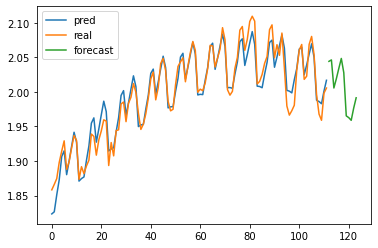

In [31]:
#  объединяем матрицы, задаем новые индексы
pred_3 = pd.concat(
    [pred, pred_2],
    sort=False
).reset_index(drop=True)

pred_3.plot()

In [32]:
#  От ряда из логарифмов возвращаемся к исходному ряду
pred_4 = 10**pred_3

<AxesSubplot:>

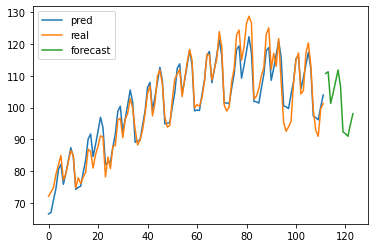

In [39]:
pred_4.plot()